In [ ]:
# prompt: use the dataset /content/IKEA_Sustainability_Extended.xlsx

import pandas as pd

df = pd.read_excel('/content/IKEA_Sustainability_Extended.xlsx')

# Now you can work with the DataFrame 'df'
print(df.head())


  Initiative_ID  CO2_Reduction   Cost  Revenue_Impact  Waste_Reduction  \
0       IKEA_01           50.5  124.8            89.7              1.3   
1       IKEA_02           51.8  122.5            89.2              2.6   
2       IKEA_03           53.1  120.2            88.7              3.9   
3       IKEA_04           54.4  117.9            88.2              5.2   
4       IKEA_05           55.7  115.6            87.7              6.5   

   Renewable_Energy_Usage  Customer_Engagement               Category  
0                   112.0                 45.9       Circular Economy  
1                   109.2                 46.7  Sustainable Materials  
2                   106.4                 47.5      Energy Efficiency  
3                   103.6                 48.3       Circular Economy  
4                   100.8                 49.1  Sustainable Materials  


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Initiative_ID           40 non-null     object 
 1   CO2_Reduction           40 non-null     float64
 2   Cost                    40 non-null     float64
 3   Revenue_Impact          40 non-null     float64
 4   Waste_Reduction         40 non-null     float64
 5   Renewable_Energy_Usage  40 non-null     float64
 6   Customer_Engagement     40 non-null     float64
 7   Category                40 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.6+ KB


,CO2_Reduction,Cost,Revenue_Impact,Waste_Reduction,Renewable_Energy_Usage,Customer_Engagement
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,75.850000,79.950000,79.950000,26.650000,57.400000,61.500000
std,15.197588,26.888039,5.845226,15.197588,32.733265,9.352362
min,50.500000,35.100000,70.200000,1.300000,2.800000,45.900000
25%,63.175000,57.525000,75.075000,13.975000,30.100000,53.700000
50%,75.850000,79.950000,79.950000,26.650000,57.400000,61.500000
75%,88.525000,102.375000,84.825000,39.325000,84.700000,69.300000
max,101.200000,124.800000,89.700000,52.000000,112.000000,77.100000


In [ ]:
# prompt: Handle missing values:

import pandas as pd

df = pd.read_excel('/content/IKEA_Sustainability_Extended.xlsx')

print(df.isnull().sum())

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].median(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df[column].fillna(df[column].mode()[0], inplace=True)

print(df.head())
df.info()
df.describe()

Initiative_ID             0
CO2_Reduction             0
Cost                      0
Revenue_Impact            0
Waste_Reduction           0
Renewable_Energy_Usage    0
Customer_Engagement       0
Category                  0
dtype: int64
  Initiative_ID  CO2_Reduction   Cost  Revenue_Impact  Waste_Reduction  \
0       IKEA_01           50.5  124.8            89.7              1.3   
1       IKEA_02           51.8  122.5            89.2              2.6   
2       IKEA_03           53.1  120.2            88.7              3.9   
3       IKEA_04           54.4  117.9            88.2              5.2   
4       IKEA_05           55.7  115.6            87.7              6.5   

   Renewable_Energy_Usage  Customer_Engagement               Category  
0                   112.0                 45.9       Circular Economy  
1                   109.2                 46.7  Sustainable Materials  
2                   106.4                 47.5      Energy Efficiency  
3                   103.6     

<ipython-input-6-63d7bcb25f50>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-6-63d7bcb25f50>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,CO2_Reduction,Cost,Revenue_Impact,Waste_Reduction,Renewable_Energy_Usage,Customer_Engagement
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,75.850000,79.950000,79.950000,26.650000,57.400000,61.500000
std,15.197588,26.888039,5.845226,15.197588,32.733265,9.352362
min,50.500000,35.100000,70.200000,1.300000,2.800000,45.900000
25%,63.175000,57.525000,75.075000,13.975000,30.100000,53.700000
50%,75.850000,79.950000,79.950000,26.650000,57.400000,61.500000
75%,88.525000,102.375000,84.825000,39.325000,84.700000,69.300000
max,101.200000,124.800000,89.700000,52.000000,112.000000,77.100000


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())
df.describe()

  Initiative_ID  CO2_Reduction      Cost  Revenue_Impact  Waste_Reduction  \
0       IKEA_01      -1.689278  1.689278        1.689278        -1.689278   
1       IKEA_02      -1.602648  1.602648        1.602648        -1.602648   
2       IKEA_03      -1.516018  1.516018        1.516018        -1.516018   
3       IKEA_04      -1.429389  1.429389        1.429389        -1.429389   
4       IKEA_05      -1.342759  1.342759        1.342759        -1.342759   

   Renewable_Energy_Usage  Customer_Engagement               Category  
0                1.689278            -1.689278       Circular Economy  
1                1.602648            -1.602648  Sustainable Materials  
2                1.516018            -1.516018      Energy Efficiency  
3                1.429389            -1.429389       Circular Economy  
4                1.342759            -1.342759  Sustainable Materials  


,CO2_Reduction,Cost,Revenue_Impact,Waste_Reduction,Renewable_Energy_Usage,Customer_Engagement
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000
mean,3.663736e-16,-1.110223e-16,-1.110223e-17,1.110223e-16,4.440892e-17,0.000000
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739
min,-1.689278e+00,-1.689278e+00,-1.689278e+00,-1.689278e+00,-1.689278e+00,-1.689278
25%,-8.446388e-01,-8.446388e-01,-8.446388e-01,-8.446388e-01,-8.446388e-01,-0.844639
50%,4.718448e-16,-2.706169e-16,0.000000e+00,1.179612e-16,0.000000e+00,0.000000
75%,8.446388e-01,8.446388e-01,8.446388e-01,8.446388e-01,8.446388e-01,0.844639
max,1.689278e+00,1.689278e+00,1.689278e+00,1.689278e+00,1.689278e+00,1.689278


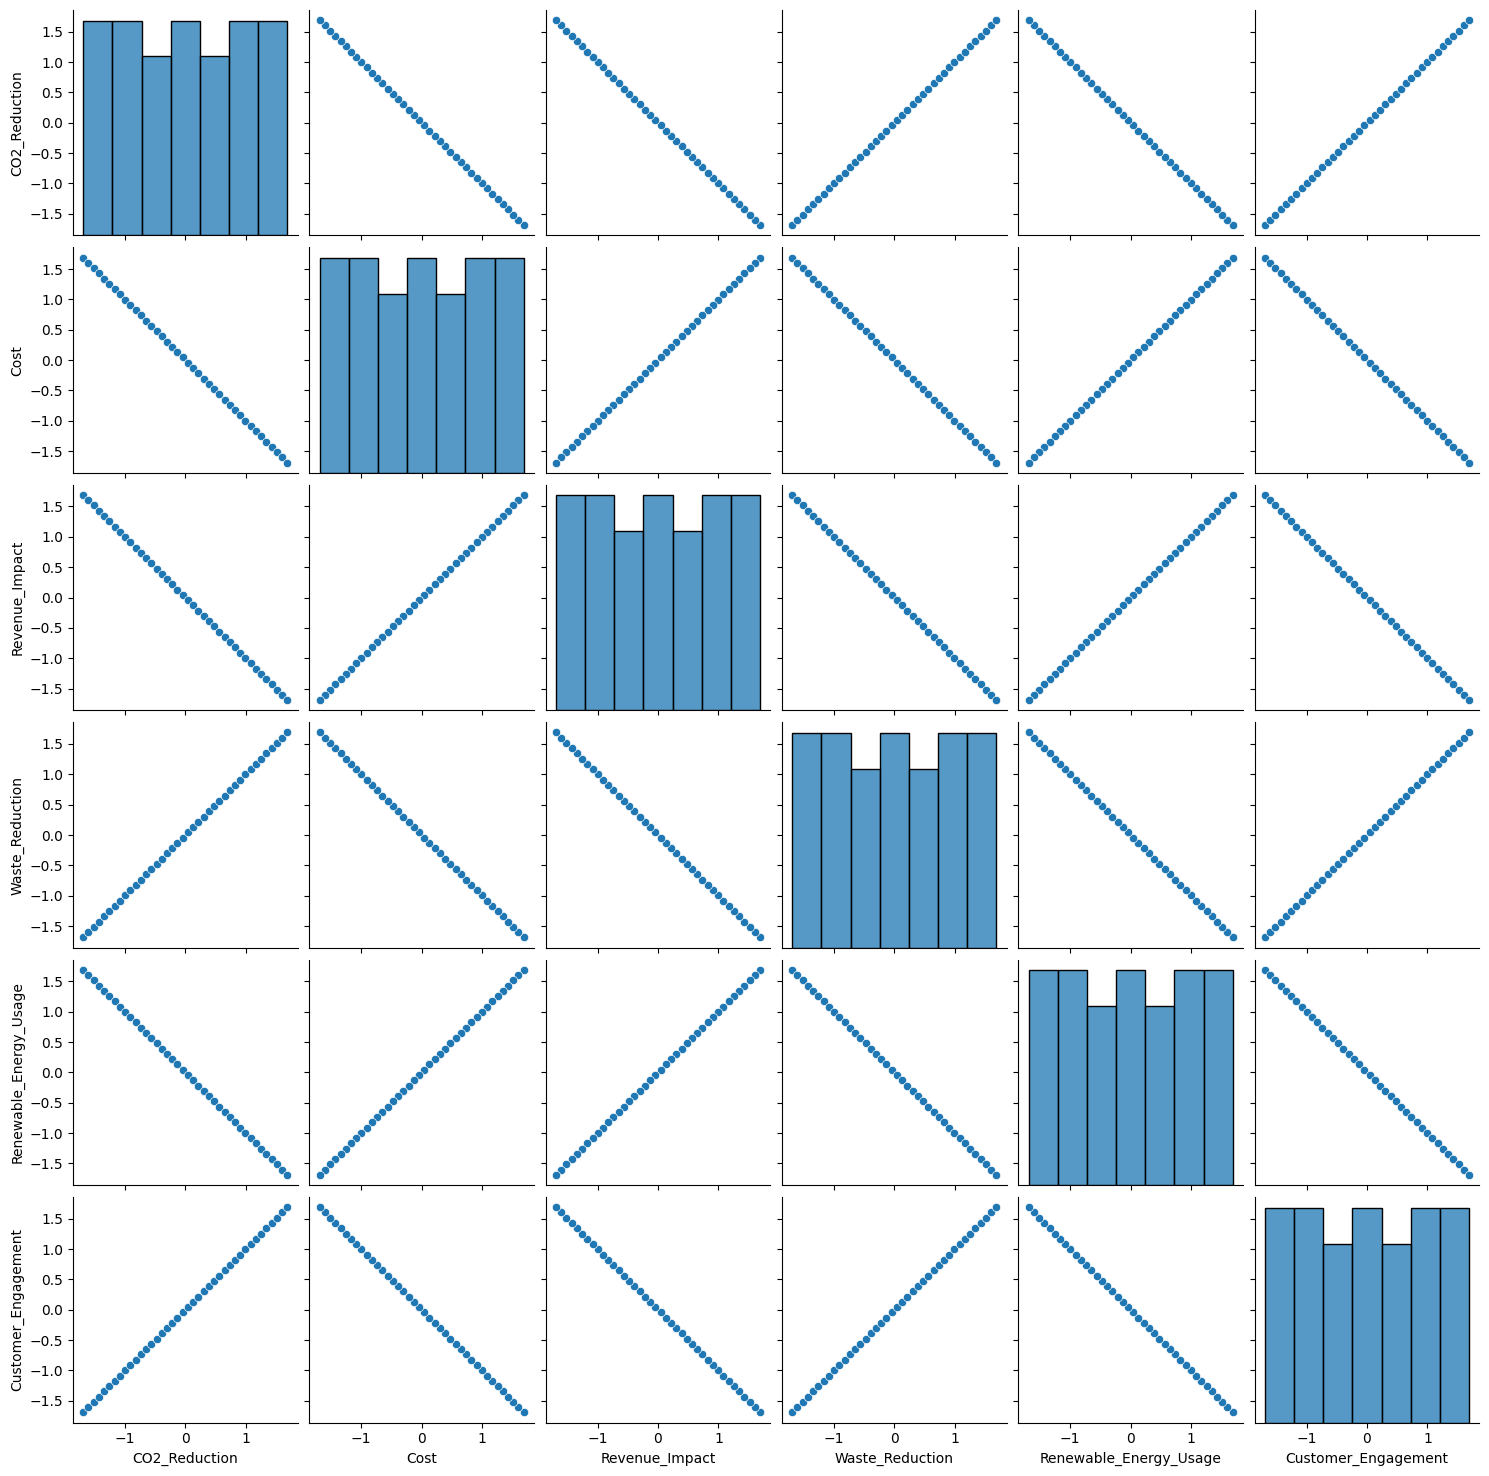

In [ ]:
sns.pairplot(df[numeric_cols])
plt.show()

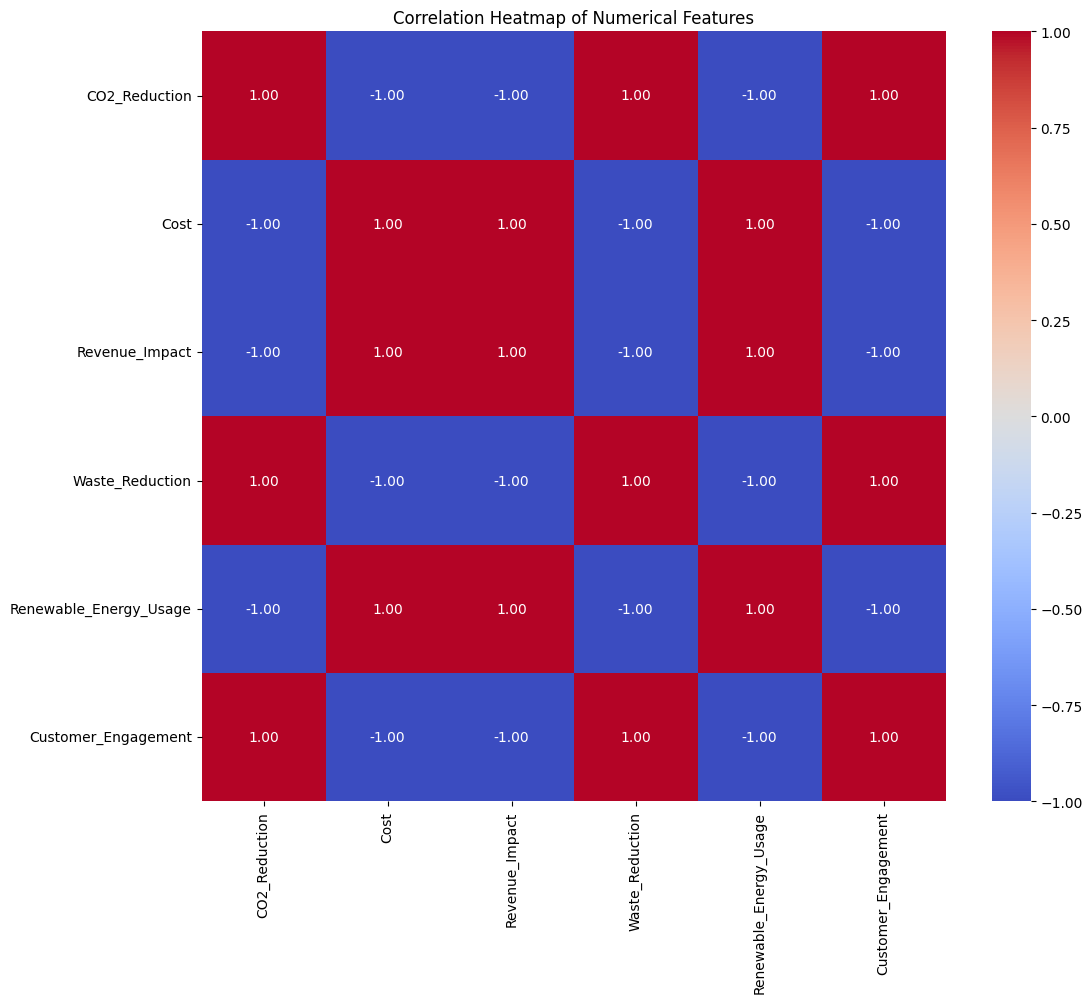

In [ ]:
# prompt: coorelation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<ipython-input-12-9b5c98544625>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-9b5c98544625>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

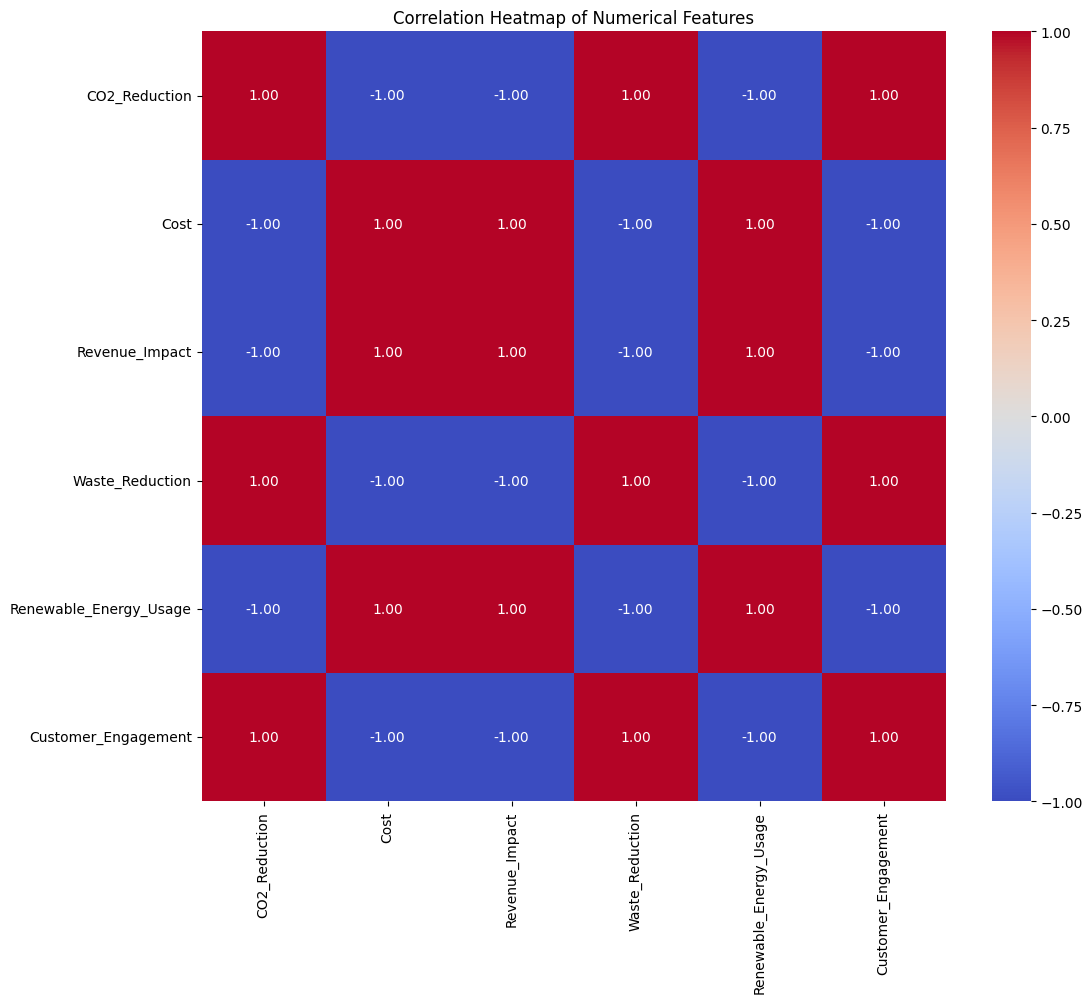

,CO2_Reduction,Cost,Revenue_Impact,Waste_Reduction,Renewable_Energy_Usage,Customer_Engagement
CO2_Reduction,1.0,-1.0,-1.0,1.0,-1.0,1.0
Cost,-1.0,1.0,1.0,-1.0,1.0,-1.0
Revenue_Impact,-1.0,1.0,1.0,-1.0,1.0,-1.0
Waste_Reduction,1.0,-1.0,-1.0,1.0,-1.0,1.0
Renewable_Energy_Usage,-1.0,1.0,1.0,-1.0,1.0,-1.0
Customer_Engagement,1.0,-1.0,-1.0,1.0,-1.0,1.0


In [ ]:
# prompt: Perform correlation analysis:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/IKEA_Sustainability_Extended.xlsx')

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].median(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df[column].fillna(df[column].mode()[0], inplace=True)
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
correlation_matrix

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_excel('/content/IKEA_Sustainability_Extended.xlsx')

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].median(), inplace=True)
    elif pd.api.types.is_string_dtype(df[column]):
        df[column].fillna(df[column].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
column1 = 'CO2_emissions'
column2 = 'Total_Renewable_Energy'

if column1 in df.columns and column2 in df.columns:
    t_statistic, p_value = stats.ttest_ind(df[column1], df[column2])
    print(f"T-test between {column1} and {column2}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
else:
    print(f"One or both columns ({column1}, {column2}) not found in the DataFrame.")

One or both columns (CO2_emissions, Total_Renewable_Energy) not found in the DataFrame.


<ipython-input-14-4ba5d77e8514>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-14-4ba5d77e8514>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Exclude non-numeric columns like 'Initiative_ID' and 'Category'
X = df.drop(['CO2_Reduction', 'Category', 'Initiative_ID'], axis=1)
y = df['CO2_Reduction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.7670484276950664e-28
R-squared: 1.0


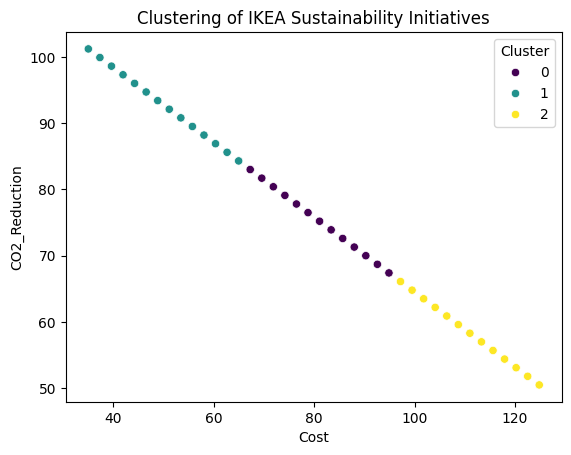

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exclude non-numeric columns like 'Initiative_ID' and 'Category'
X_for_clustering = df.drop(['CO2_Reduction', 'Category', 'Initiative_ID'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_for_clustering)

sns.scatterplot(data=df, x='Cost', y='CO2_Reduction', hue='Cluster', palette='viridis')
plt.title("Clustering of IKEA Sustainability Initiatives")
plt.show()

In [ ]:
avg_impact = df.groupby('Category')[['CO2_Reduction', 'Waste_Reduction']].mean()
print(avg_impact)

avg_revenue = df.groupby('Category')['Revenue_Impact'].mean()
print(avg_revenue)

                       CO2_Reduction  Waste_Reduction
Category                                             
Circular Economy               75.85            26.65
Energy Efficiency              76.50            27.30
Sustainable Materials          75.20            26.00
Category
Circular Economy         79.95
Energy Efficiency        79.70
Sustainable Materials    80.20
Name: Revenue_Impact, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset (adjust the path as needed)
file_path = '/content/IKEA_Sustainability_Extended.xlsx'  # Replace with the actual file path in Colab
df = pd.read_excel(file_path)

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns and create a new DataFrame with scaled values
df_scaled = df.copy()  # Preserve original dataset
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the scaled dataset
print("Scaled Dataset (First 5 Rows):")
print(df_scaled.head())

# Optional: Describe the scaled data for an overview of its statistical properties
print("\nDescription of Scaled Numeric Data:")
print(df_scaled[numeric_cols].describe())

# Save the scaled DataFrame back to Excel for reference (if needed)
output_path = '/content/Scaled_IKEA_Sustainability.xlsx'
df_scaled.to_excel(output_path, index=False)
print(f"\nScaled dataset saved to: {output_path}")


Scaled Dataset (First 5 Rows):
  Initiative_ID  CO2_Reduction      Cost  Revenue_Impact  Waste_Reduction  \
0       IKEA_01      -1.689278  1.689278        1.689278        -1.689278   
1       IKEA_02      -1.602648  1.602648        1.602648        -1.602648   
2       IKEA_03      -1.516018  1.516018        1.516018        -1.516018   
3       IKEA_04      -1.429389  1.429389        1.429389        -1.429389   
4       IKEA_05      -1.342759  1.342759        1.342759        -1.342759   

   Renewable_Energy_Usage  Customer_Engagement               Category  
0                1.689278            -1.689278       Circular Economy  
1                1.602648            -1.602648  Sustainable Materials  
2                1.516018            -1.516018      Energy Efficiency  
3                1.429389            -1.429389       Circular Economy  
4                1.342759            -1.342759  Sustainable Materials  

Description of Scaled Numeric Data:
       CO2_Reduction          Cost  R

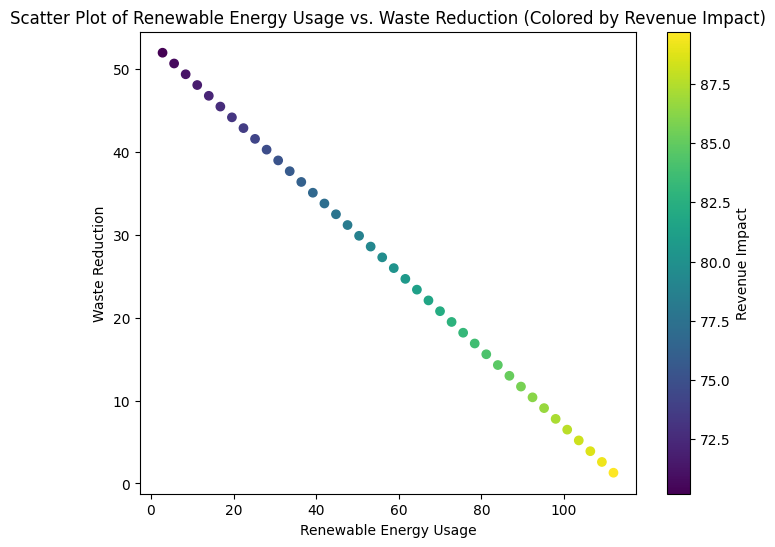

In [ ]:
# prompt: scatter plot on Renewable_Energy_Usage,Waste_Reduction,Revenue_Impact

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Renewable_Energy_Usage'], df['Waste_Reduction'], c=df['Revenue_Impact'], cmap='viridis')
plt.xlabel('Renewable Energy Usage')
plt.ylabel('Waste Reduction')
plt.title('Scatter Plot of Renewable Energy Usage vs. Waste Reduction (Colored by Revenue Impact)')
plt.colorbar(label='Revenue Impact')
plt.show()

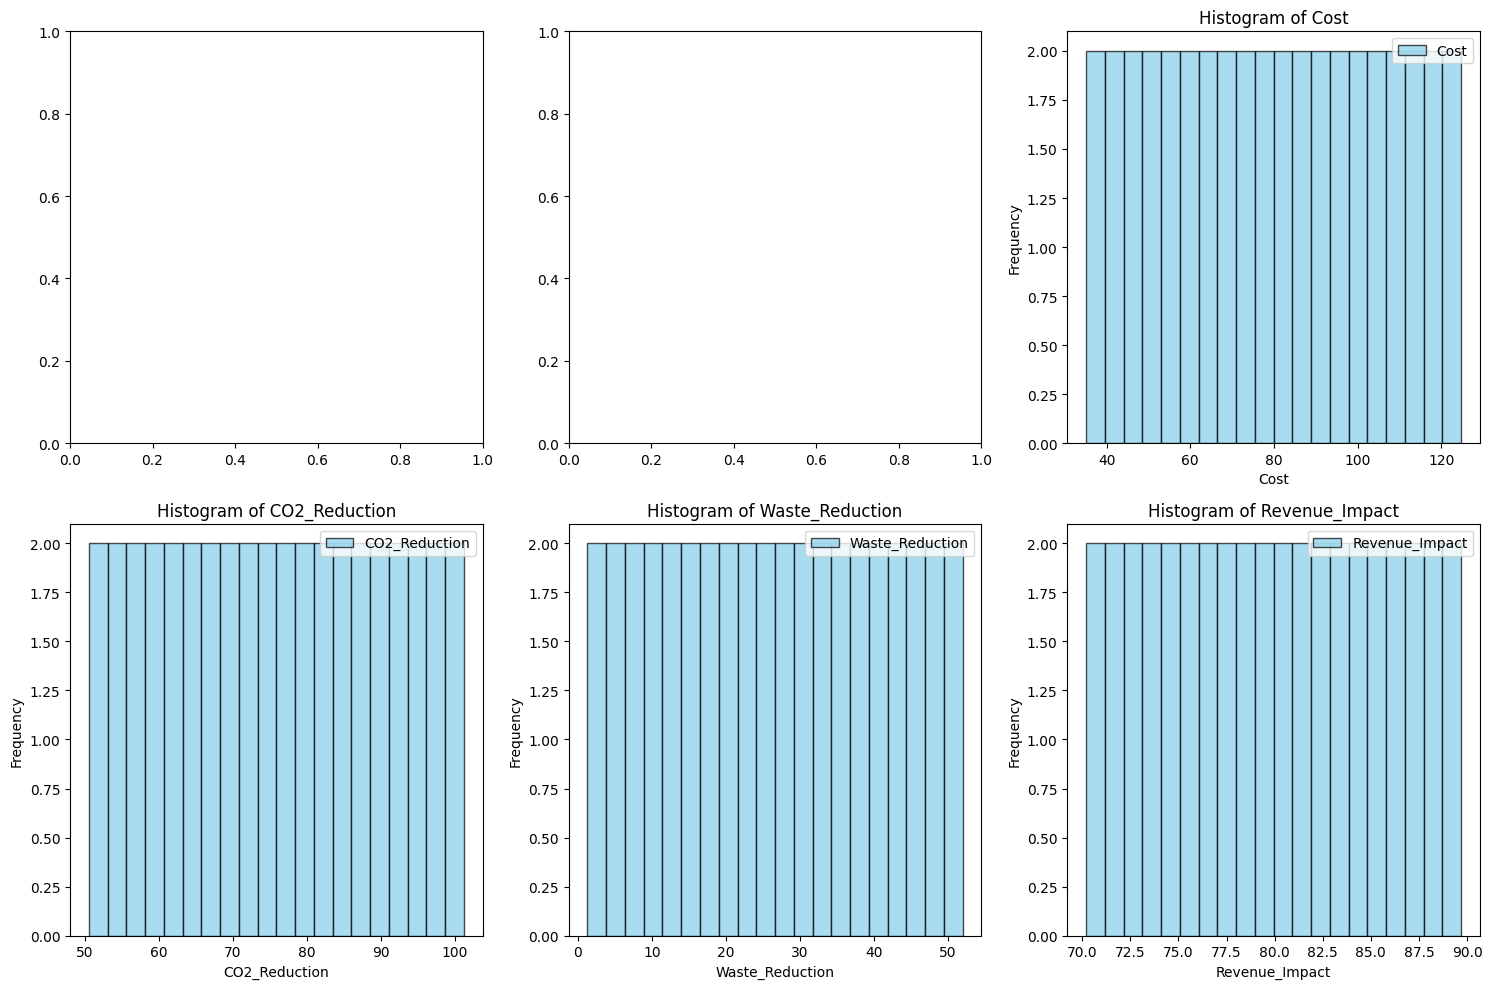